# Example_1: Correlation and Covariance matrices.

In [9]:
import pandas as pd, numpy as np, random, matplotlib.pyplot as plt, calendar 
import seaborn as sns

In [90]:
# generate dataset : financial.csv, containing monthly returns for three assets (A, B,C, and D) over a period of one year.
np.random.seed(46)
A = np.random.uniform(0.01, 0.05, size=12).round(2)
B = A + np.random.uniform(-0.01, 0.01, size=12).round(2)  # Positively correlated with some noise
C = -A + np.random.uniform(-0.005, 0.005, size=12).round(2)

df = pd.DataFrame({'Month':list(calendar.month_name)[1:],
                  'Asset_A':A,
                  'Asset_B':B,
                  'Asset_C': C,
                  'Asset_D':np.random.uniform(0.01, 0.05, size=12).round(2) })
                  
df



,Month,Asset_A,Asset_B,Asset_C,Asset_D
0,January,0.04,0.04,-0.04,0.01
1,February,0.04,0.04,-0.04,0.02
2,March,0.02,0.03,-0.02,0.04
3,April,0.04,0.04,-0.04,0.05
4,May,0.02,0.01,-0.02,0.01
5,June,0.05,0.06,-0.05,0.05
6,July,0.01,0.01,-0.01,0.01
7,August,0.03,0.03,-0.03,0.04
8,September,0.05,0.04,-0.05,0.01
9,October,0.03,0.03,-0.03,0.02


In [91]:
# calculating the mean of each asset.
df.loc[:, df.columns != 'Month'].mean()

Asset_A    0.030833
Asset_B    0.030000
Asset_C   -0.030833
Asset_D    0.025000
dtype: float64

In [92]:
# correlation_matrix
correlation_matrix = df.loc[:, df.columns != 'Month'].corr()
print('correlation_matrix\n\n', correlation_matrix)

correlation_matrix

           Asset_A   Asset_B   Asset_C   Asset_D
Asset_A  1.000000  0.900506 -1.000000  0.273518
Asset_B  0.900506  1.000000 -0.900506  0.528396
Asset_C -1.000000 -0.900506  1.000000 -0.273518
Asset_D  0.273518  0.528396 -0.273518  1.000000


In [93]:
covariance_matrix = df.loc[:, df.columns != 'Month'].cov()
print('covariance_matrix\n\n', covariance_matrix )

covariance_matrix

           Asset_A   Asset_B   Asset_C   Asset_D
Asset_A  0.000190  0.000191 -0.000190  0.000059
Asset_B  0.000191  0.000236 -0.000191  0.000127
Asset_C -0.000190 -0.000191  0.000190 -0.000059
Asset_D  0.000059  0.000127 -0.000059  0.000245


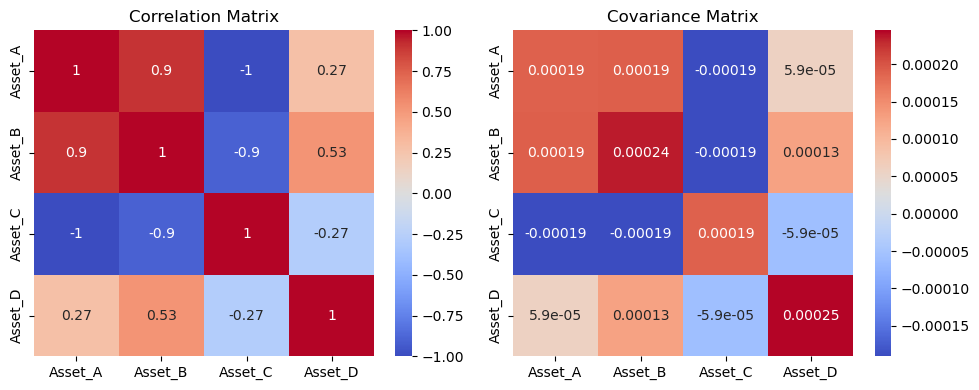

In [94]:
# Plot the correlation matrix
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')

# Plot the covariance matrix
plt.subplot(1, 2, 2)
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm')
plt.title('Covariance Matrix')

plt.tight_layout()
plt.show()

Summary:

The covariance matrix indicates weak linearity or relationship between the three assets.

The correlation matrix indicates the direction and strength of the linear relationships between the assets:

   - Asset_A and Asset_B: positive correlation 0.9
   
   - Asset_A and Asset_C: negative correlation -1
   
   - Asset_B and Asset_C: negative correlation
   
   - Asset_A and Asset_D: no correlation weak correlation
   
Correlation values are standardized, meaning they range from -1 to 1, allowing for comparison regardless of the scale of the original data.

Covariance values, on the other hand, are not standardized and their magnitude depends on the scale of the variables.

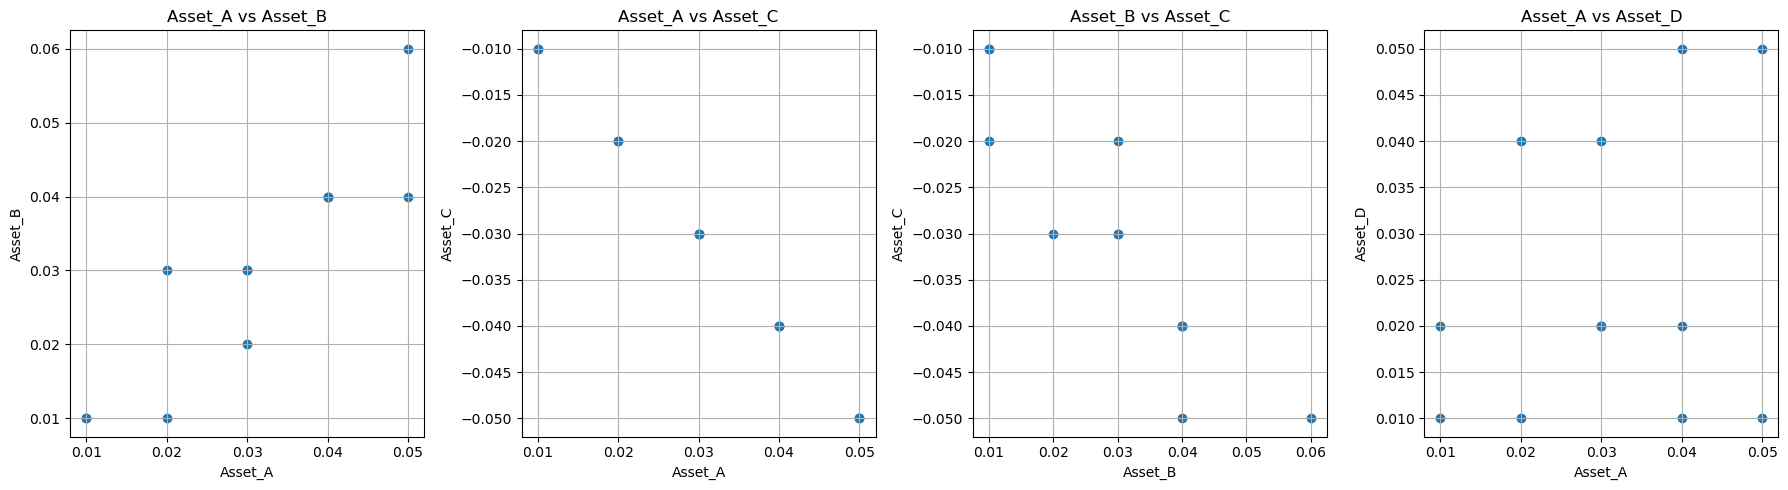

In [98]:
import matplotlib.pyplot as plt

# Scatter plots for Asset_A vs Asset_B, Asset_A vs Asset_C, Asset_B vs Asset_C
plt.figure(figsize=(18, 5))

# Asset_A vs Asset_B
plt.subplot(1, 4, 1)
plt.scatter(df['Asset_A'], df['Asset_B'])
plt.title('Asset_A vs Asset_B')
plt.xlabel('Asset_A')
plt.ylabel('Asset_B')
plt.grid(True)

# Asset_A vs Asset_C
plt.subplot(1, 4, 2)
plt.scatter(df['Asset_A'], df['Asset_C'])
plt.title('Asset_A vs Asset_C')
plt.xlabel('Asset_A')
plt.ylabel('Asset_C')
plt.grid(True)

# Asset_B vs Asset_C
plt.subplot(1, 4, 3)
plt.scatter(df['Asset_B'], df['Asset_C'])
plt.title('Asset_B vs Asset_C')
plt.xlabel('Asset_B')
plt.ylabel('Asset_C')
plt.grid(True)

# Asset_A vs Asset_D
plt.subplot(1, 4, 4)
plt.scatter(df['Asset_A'], df['Asset_D'])
plt.title('Asset_A vs Asset_D')
plt.xlabel('Asset_A')
plt.ylabel('Asset_D')
plt.grid(True)

plt.tight_layout()
plt.show()
